### Data Processing

In [1]:
import pandas as pd
import numpy as np
from numpy import array

Raw_Cities_Distance = pd.read_excel('Korea-Distance.xlsx', index_col=0)
Label = pd.read_excel('Korea-Distance.xlsx')
Raw_Cities_Distance = Raw_Cities_Distance.fillna(0)

Raw_Cities_Distance
# Label

,Incheon,Seoul,Busan,Daegu,Daejeon,Gwangju,Suwon-si,Ulsan,Jeonju,Cheongju-si,Changwon,Jeju-si,Chuncheon,Hongsung,Muan
Incheon,0.0,27.0,335.0,244.0,141.0,257.0,33.0,316.0,186.0,115.0,304.0,439.0,102.0,95.0,275.0
Seoul,27.0,0.0,330.0,237.0,144.0,268.0,31.0,307.0,195.0,113.0,301.0,453.0,75.0,111.0,290.0
Busan,335.0,330.0,0.0,95.0,199.0,193.0,304.0,54.0,189.0,221.0,35.0,291.0,330.0,271.0,233.0
Daegu,244.0,237.0,95.0,0.0,117.0,171.0,212.0,75.0,130.0,130.0,72.0,324.0,236.0,191.0,215.0
Daejeon,141.0,144.0,199.0,117.0,0.0,137.0,114.0,192.0,61.0,36.0,167.0,323.0,175.0,74.0,171.0
Gwangju,257.0,268.0,193.0,171.0,137.0,0.0,238.0,222.0,77.0,173.0,161.0,186.0,311.0,162.0,44.0
Suwon-si,33.0,31.0,304.0,212.0,114.0,238.0,0.0,284.0,164.0,84.0,274.0,423.0,91.0,83.0,260.0
Ulsan,316.0,307.0,54.0,75.0,192.0,222.0,284.0,0.0,198.0,205.0,67.0,341.0,296.0,266.0,265.0
Jeonju,186.0,195.0,189.0,130.0,61.0,77.0,164.0,198.0,0.0,96.0,154.0,264.0,234.0,97.0,111.0
Cheongju-si,115.0,113.0,221.0,130.0,36.0,173.0,84.0,205.0,96.0,0.0,190.0,359.0,139.0,74.0,205.0


In [2]:
# transform to numpy
Cities_Distance = Raw_Cities_Distance.to_numpy()

### Generate a list for cities <-> index mapping

In [3]:
df = Label.iloc[:,0]
print(df)


0         Incheon
1           Seoul
2           Busan
3           Daegu
4         Daejeon
5         Gwangju
6        Suwon-si
7           Ulsan
8          Jeonju
9     Cheongju-si
10       Changwon
11        Jeju-si
12      Chuncheon
13       Hongsung
14           Muan
Name: Unnamed: 0, dtype: object


### Generate all possible cities permutation

In [4]:

initial_schedule = list(range(len(Cities_Distance)))

def get_permutation(current_schedule):
    permutation = []
    for i in range(len(current_schedule)):
        for j in range(i+1, len(current_schedule)):
            neighbor = current_schedule.copy()
            neighbor[i] = current_schedule[j]
            neighbor[j] = current_schedule[i]

            # to convenient the work, I set the data structure of permutation matrix as follow
            # i, j will memorized which cities were swapped in the current route.
            # example:
            #   0   1   2      3    ...   15       16      17      18
            #   i   j   City1  City2      City14   City15  City1   0 (the place to fill in total travel distance)
            #   .   .   .      .    ...   .        .       .       .
            #   .   .   .      .    ...   .        .       .       .
            #   .   .   .      .    ...   .        .       .       .

            loc = [i, j]    # correspond to boolean table
            loc.extend(neighbor)    # schedule after randomly swapping two cities
            loc.extend([0,0])   # a place to memorized the city we start and another for total distance
            permutation.append(loc)

    permutation = np.array(permutation)

    return permutation

### Method to get the distance of input schedule

In [5]:
def get_schedule_length(arbitrary_array):
    sum = 0
    for j in range(len(arbitrary_array)-1):
        sum += Cities_Distance[arbitrary_array[j],arbitrary_array[j+1]]
    return sum

### Method to get a new schedule from inout permutation matrix

In [6]:
def get_new_schedule(permutation, best_result, boolean_table):
    # declaration
    store_i = 0
    store_j = 0
    current_schedule = []

    # compare all possibilities route in permutation matirx, and choose the best.
    for i in range(len(permutation)):
        sum = 0
        sum = get_schedule_length(permutation[i,2:18])

        if boolean_table[permutation[i,0], permutation[i,1]]!=1:
            permutation[i,18] = int(sum)
            if (sum < best_result):
                best_result = sum
                store_i = permutation[i,0]
                store_j = permutation[i,1]
                current_schedule = permutation[i,2:17]

    # mark the cities that have been swapped
    boolean_table[store_i, store_j] = 1
    boolean_table[store_j, store_i] = 1

    return current_schedule, best_result, boolean_table

---
### Part II. (c) Run Random Walk to find the optimal path


In [7]:
# Initialization
best_result = get_schedule_length(np.append(initial_schedule, initial_schedule[0]))
best_schedule = initial_schedule
RW = []
RW.append(best_result)

for i in range(100):
    # random select an route from the permutation of old schedule
    current_schedule = np.random.permutation(best_schedule)
    current_schedule_with_start_pt = np.append(current_schedule,current_schedule[0])
    if(get_schedule_length(current_schedule_with_start_pt)<best_result):
        best_schedule = current_schedule
        best_result = get_schedule_length(current_schedule_with_start_pt)
    RW.append(best_result)

RW_best_schedule = best_schedule

---
### Part II. (d) Run Hill Climbing to find the optimal path

In [8]:
# Initialization
best_schedule = initial_schedule
best_result = 10e6
HC = []
HC.append(get_schedule_length(np.append(initial_schedule, initial_schedule[0])))

# Start Iterations
for i in range(100):
    for j in range(1000): # try 1000 possible route in each iteration. (much less than 15!)
        current_schedule = np.random.permutation(best_schedule)
        current_schedule_with_start_pt = np.append(current_schedule,current_schedule[0])
        if(get_schedule_length(current_schedule_with_start_pt)<best_result):
            best_schedule = current_schedule
            best_result = get_schedule_length(current_schedule_with_start_pt)
    HC.append(best_result)
# print(HC)
HC_best_schedule = best_schedule

---
### Part II. (e) Run Tabular Search to find the optimal path

In [9]:
# build a boolean table for TS, to determine whether swap or not
size = len(Cities_Distance)
TS_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    TS_boolean_table[0, i] = TS_boolean_table[i, 0] = 1

In [10]:
# Initialization
best_result = 10e6
TS = []
TS.append(get_schedule_length(np.append(initial_schedule, [0])))
best_schedule = initial_schedule

# iteration
for i in range(100):
    # print(f'Step:{i}')
    permutation = get_permutation(best_schedule)
    current_schedule, best_result, TS_boolean_table = get_new_schedule(permutation,
                                                                       best_result,
                                                                       TS_boolean_table)
    if current_schedule != []:
        best_schedule = current_schedule
    else:
        pass

    best_schedule_with_start_pt = np.append(best_schedule, best_schedule[0])
    TS.append(get_schedule_length(best_schedule_with_start_pt))

best_schedule = np.append(best_schedule, best_schedule[0])
best_result = get_schedule_length(best_schedule)
TS_best_schedule = best_schedule

C:\Users\woody\Desktop\(Wed_234)_Computation_of_Data_Science\Homework\venv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


---
### Part III. (a) SA on travel route problem

In [11]:
# Define iteration numbers
n = 2
# Set temperature reduction factor
c = 0.5
NO_UPDATE_TIMES = 10e4

SA = []
SA.append(get_schedule_length(np.append(initial_schedule, initial_schedule[0])))

# Main
best_schedule = initial_schedule
import numpy as np
rand_4pts = []
for j in range(4):
    rand_schedule = np.random.permutation(initial_schedule)
    rand_4pts.append(get_schedule_length(np.append(rand_schedule, rand_schedule[0])))

init_temp = np.mean(rand_4pts)
print(f'The init_temp is: {init_temp}')

temp = init_temp
no_update_times = 0
update_times = 0

# set terminating condition
while((update_times<100)&(no_update_times<=NO_UPDATE_TIMES)):
    iter = 0
    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        current_schedule = best_schedule

        # randomly select an new_schedule
        new_schedule = np.random.permutation(current_schedule)

        current_schedule_distance = get_schedule_length(np.append(current_schedule, current_schedule[0]))
        new_schedule_distance = get_schedule_length(np.append(new_schedule, new_schedule[0]))
        del_f = new_schedule_distance - current_schedule_distance

        if (del_f)<0:
            r = np.random.uniform(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))

            if Prob_of_X_2>r:
                best_schedule = new_schedule
                SA.append(float(get_schedule_length(np.append(best_schedule, best_schedule[0]))))
                # print(SA)
                temp = c*temp
                update_times +=1
                no_update_times = 0
        else:
            no_update_times +=1

        iter += 1

# append value to the rest of elements in the list
for i in range(update_times+1, 101):
    SA.append(float(get_schedule_length(np.append(best_schedule, best_schedule[0]))))
SA_best_schedule = best_schedule

The init_temp is: 2951.75


---
### FE plot

#### FE plot for Part II.

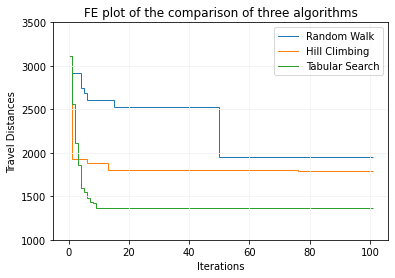

In [12]:
import matplotlib.pyplot as plt
plot1 = plt.stairs(RW, label='Random Walk', baseline=None)
plot1 = plt.stairs(HC, label='Hill Climbing', baseline=None)
plot1 = plt.stairs(TS, label='Tabular Search', baseline=None)

plot1 = plt.xlabel('Iterations')
plot1 = plt.ylabel('Travel Distances')
plot1 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plot1 = plt.ylim(1000, 3500)
plot1 = plt.grid(axis='both', color='0.95')

plot1 = plt.legend(loc=1)

plot1 = plt.show()

#### FE plot for bonus

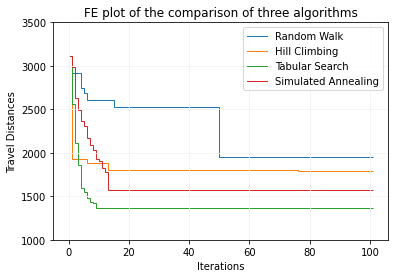

In [13]:
plot2 = plt.stairs(RW, label='Random Walk', baseline=None)
plot2 = plt.stairs(HC, label='Hill Climbing', baseline=None)
plot2 = plt.stairs(TS, label='Tabular Search', baseline=None)
plot2 = plt.stairs(SA, label='Simulated Annealing', baseline=None)

plot2 = plt.xlabel('Iterations')
plot2 = plt.ylabel('Travel Distances')
plot2 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plot2 = plt.ylim(1000, 3500)
plot2 = plt.grid(axis='both', color='0.95')

plot2 = plt.legend(loc=1)

plot2 = plt.show()

---
### Save the result

In [14]:
import json

with open('result\Second_Part\RW.json', 'w') as f:
    json.dump(RW, f)

with open('result\Second_Part\HC.json', 'w') as f:
    json.dump(HC, f)

with open('result\Second_Part\TS.json', 'w') as f:
    json.dump(TS, f)

### Print out travel distances and travel path

In [15]:
print(RW[100], HC[100], TS[100], SA[100])
for i in range(len(RW_best_schedule)):
    print(f'{df[RW_best_schedule[i]]}, ', end = " " )
print('\n')

for i in range(len(HC_best_schedule)):
    print(f'{df[HC_best_schedule[i]]}, ', end = " " )
print('\n')


for i in range(len(TS_best_schedule)):
    print(f'{df[TS_best_schedule[i]]}, ', end = " " )
print('\n')

for i in range(len(SA_best_schedule)):
    print(f'{df[SA_best_schedule[i]]}, ', end = " " )
print('\n')

1953.0 1794.0 1370.0 1576.0
Gwangju,  Daejeon,  Changwon,  Busan,  Ulsan,  Daegu,  Hongsung,  Jeonju,  Seoul,  Cheongju-si,  Chuncheon,  Suwon-si,  Incheon,  Muan,  Jeju-si,  

Gwangju,  Daegu,  Cheongju-si,  Suwon-si,  Incheon,  Seoul,  Chuncheon,  Hongsung,  Ulsan,  Busan,  Changwon,  Jeju-si,  Muan,  Daejeon,  Jeonju,  

Incheon,  Seoul,  Chuncheon,  Cheongju-si,  Daejeon,  Jeonju,  Gwangju,  Muan,  Jeju-si,  Changwon,  Busan,  Ulsan,  Daegu,  Hongsung,  Suwon-si,  Incheon,  

Chuncheon,  Seoul,  Incheon,  Suwon-si,  Cheongju-si,  Jeonju,  Daejeon,  Changwon,  Daegu,  Ulsan,  Busan,  Jeju-si,  Muan,  Gwangju,  Hongsung,  

